In [1]:
import gym
import gym_oscillator
from gym import error, spaces, utils
from gym import Space
from gym.utils import seeding
from gym_oscillator.envs.osc_env import oscillatorEnv

from stable_baselines.common import set_global_seeds
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv,SubprocVecEnv,VecNormalize, VecEnv
from stable_baselines import PPO2, ACKTR
import numpy as np
from gym.spaces import Box
import os
import numpy as np
import oscillator_cpp
import yaml
from collections import deque
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

/home/v_skliarova/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/v_skliarova/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/v_skliarova/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/v_skliarova/.local/lib/python3.7/site-packages/tensorflow/python/frame

In [2]:
with open('configs/config.yml', 'r') as ymlfile:
    cfg = yaml.load(ymlfile,Loader=yaml.FullLoader)

In [3]:
cfg

{'ep_length': 400,
 'R0': 1,
 'theta_0': 0,
 'width_p': 300,
 'gap': 10,
 'Kfactor': 1,
 'memory_size': 10000,
 'high_actions': [5400, 4],
 'low_actions': [0, 1],
 'osc_period': 6280,
 'step': 1,
 'action_space': 'DBox',
 'model': 'ACKTR_180_5380_4_debug_400_episode_250mln.zip',
 'save_model': '24_05_6000_2.zip',
 'save_path': './callbacks/',
 'freq': 100000,
 'prefix': 'rl_1200_6000_6_v2',
 'tensorboard_log': 'MLP/',
 'num_cpu': 12,
 'interval_theta': 4,
 'num_learning_steps': 50000000,
 'num_eval_steps': 100,
 'log_interval': 1000}

In [4]:
# env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
# env.reset()
# model = ACKTR(MlpPolicy, env, verbose=1)

In [5]:
# model.learn(100)

In [6]:

# for i in range(1000):
#     model.env.action_space.sample()

In [7]:
model = ACKTR.load('24_05_6000_2.zip')
env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
model.set_env(env)

Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

envs DBox(-1, 1, (2,), <class 'numpy.float32'>)


In [8]:
from tools.tools import predict, convert_to_period
obs, acr, t = predict(model, env)

  0%|          | 0/400 [00:00<?, ?it/s]


AssertionError: 

In [18]:
convert_to_period(1)

0.00015915494309189535

In [19]:
convert_to_period(5080)

0.8085071109068284

In [10]:
theta = np.argmax(t) * 2* np.pi/ 400
print(theta)

0.9110618695410401


In [28]:
obs[58]
acr[58]

array([[ 0.69333333, -1.        ]])

In [9]:
np.argmax(t)

58

In [11]:
# obs, acr, t = predict(model, env)
rews_ = []
obs_ = []
acs_ = []
obs = env.reset()
cum_list = []
rew = 0
rews_before = []
# env.current_step = 58
# for i in tqdm(range(400)):
#     obs = np.array([2*np.pi/400*i])
#     actions, _ = model.predict(obs)
#     acs_.append(actions)

for i in tqdm(range(400)):
    print('ff')
    action, _states = model.predict(obs)
    print('dddd', action)
    obs, rewards, dones, info = env.step(action)
    obs_.append(obs)
    rews_before.append(rewards[0]/100-1)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards

    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0

  0%|          | 0/400 [00:00<?, ?it/s]

ff
dddd [[6.4457141e+02 9.4959944e+29]]


AssertionError: 

In [41]:
model.env.action_space

DBox(-1, 1, (2,), <class 'numpy.float32'>)

In [14]:
acs_[0]

array([ 0.69333333, -1.        ])

In [15]:
env.step(acs_[0])

action 0.6933333333333334
denorm in func 0.6933333333333334 [0 1] [6000    6]
result [5080.            5.23333333]
deact [5080.            5.23333333]


AssertionError: 

In [31]:
obs = env.reset()
rews_before = []
for i in tqdm(range(400)):
    obs, rewards, dones, info = env.step([acs_[i]])
    obs_.append(obs)
    rews_before.append(rewards[0]/100-1)
#     acs_.append(action)
    rews_.append(rewards)
    rew += rewards

    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0

100%|██████████| 400/400 [00:00<00:00, 1459.04it/s]


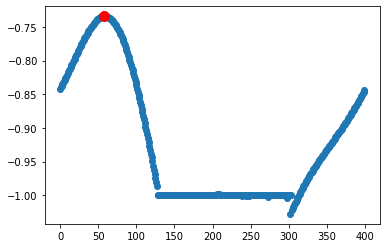

In [39]:
plt.plot(rews_before, 'o')
plt.plot(np.argmax(rews_before), np.max(rews_before),'ro', markersize=10)

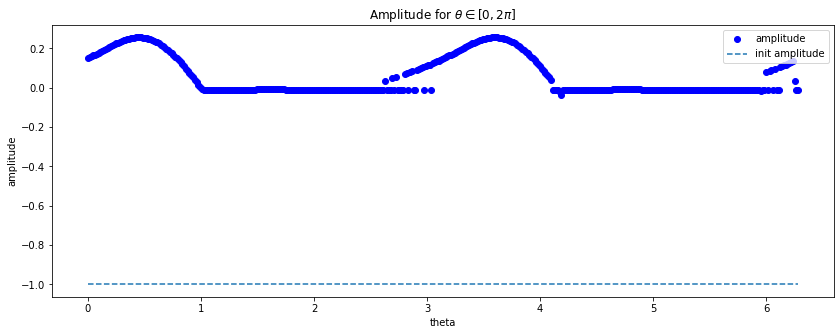

In [14]:

plt.figure(figsize=(14, 5))
plt.title(r'Amplitude for $\theta\in[0, 2\pi]$')
N = len(rews_before)
plt.plot(np.linspace(0, 2*np.pi, N),  rews_before[:400], 'o', color='b', label='amplitude')
plt.plot(np.linspace(0, 2*np.pi, N), [-1]*N, '--', label='init amplitude')
plt.legend(loc='upper right')
plt.xlabel('theta')
plt.ylabel('amplitude')
plt.show()

In [18]:
obs, acr, t = predict(model, env)

NameError: name 'predict' is not defined

In [22]:
theta = np.argmax(rews_before) * 2* np.pi/ 400
print(theta)

0.926769832808989


In [23]:
max(rews_before)

-0.7340784645080567

In [22]:
np.argmax(rews_before)

58

In [39]:
high_a = np.array([850, 6000, 6])
low_a = np.array([1, 0, 1])

In [40]:
def denormalize_actions(action):
    de_act = low_a + (high_a-low_a) * (action+1)/2 
    return de_act
  

In [41]:
actions = np.array(acr).reshape(400, 3)

In [42]:
denormalized = []
for i in range(len(actions)):    
    denormalized.append(denormalize_actions(actions[i]))

In [47]:
denormalized[86]

array([8.50e+02, 4.63e+03, 1.00e+00])

In [69]:
denormalized[83]

array([7.96759346e+02, 4.68800000e+03, 1.00000000e+00])

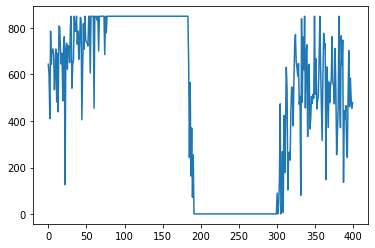

In [44]:
plt.plot(np.array(denormalized)[:, 0])

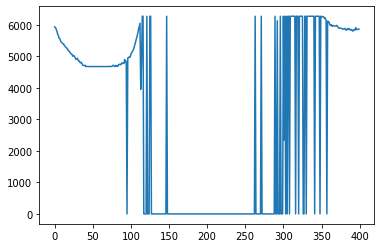

In [67]:
plt.plot(np.array(denormalized)[:, 1])

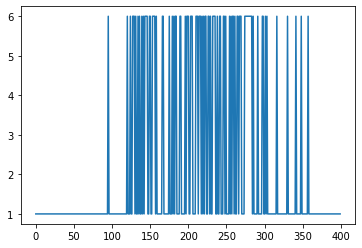

In [68]:
plt.plot(np.array(denormalized)[:, 2])

 19%|█▉        | 77/400 [00:00<00:00, 762.95it/s]

ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh


 38%|███▊      | 154/400 [00:00<00:00, 633.36it/s]

ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh


 93%|█████████▎| 372/400 [00:00<00:00, 639.74it/s]

ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh


100%|██████████| 400/400 [00:00<00:00, 622.99it/s]


ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh


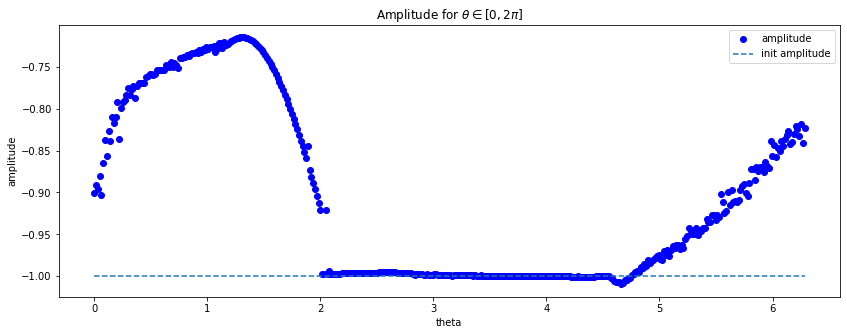

In [20]:
obs, acr, t = predict(model, env)

 26%|██▋       | 106/400 [00:00<00:00, 556.49it/s]

ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh


 54%|█████▍    | 215/400 [00:00<00:00, 480.95it/s]

ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh


 98%|█████████▊| 392/400 [00:00<00:00, 687.97it/s]

ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh
ehehheh


100%|██████████| 400/400 [00:00<00:00, 611.94it/s]


ehehheh
ehehheh
ehehheh
ehehheh


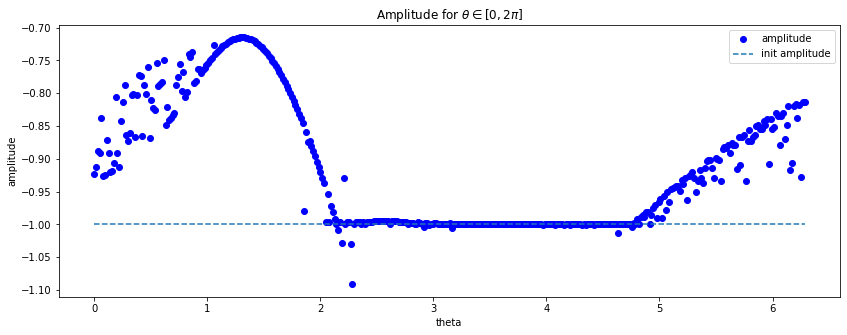

In [10]:
obs, acr, t = predict(model, env)

In [11]:
acr

[array([[ 0.94073659,  0.576     , -1.        ]]),
 array([[ 0.89259577,  0.58866667, -1.        ]]),
 array([[ 0.76951116,  0.622     , -1.        ]]),
 array([[ 0.79440159,  0.61533333, -1.        ]]),
 array([[ 0.52918077,  0.686     , -1.        ]]),
 array([[ 1.  ,  0.56, -1.  ]]),
 array([[ 1.  ,  0.56, -1.  ]]),
 array([[ 0.73595428,  0.63066667, -1.        ]]),
 array([[ 0.84644133,  0.60133333, -1.        ]]),
 array([[ 1.  ,  0.56, -1.  ]]),
 array([[ 1.  ,  0.56, -1.  ]]),
 array([[ 0.94204104,  0.576     , -1.        ]]),
 array([[ 0.44791272,  0.70733333, -1.        ]]),
 array([[ 0.89483887,  0.58866667, -1.        ]]),
 array([[ 1.  ,  0.56, -1.  ]]),
 array([[ 0.68998361,  0.64266667, -1.        ]]),
 array([[ 0.55420303,  0.67933333, -1.        ]]),
 array([[ 0.38803777,  0.72333333, -1.        ]]),
 array([[ 0.81785595,  0.60866667, -1.        ]]),
 array([[ 0.86845028,  0.59533333, -1.        ]]),
 array([[ 0.82839859,  0.606     , -1.        ]]),
 array([[ 0.5719437

In [37]:
acr

[array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.20881283, -0.2       ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.34894431, -0.6       ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.

In [32]:
full_rews = []
full_acs = []
normal_vec = []
rews_beforer = []
for j in tqdm(range(10)):
    rews_r = []
    #Store observations
    obs_r = []
    acs_r = []
    obsr = env.reset()
    cum_listr = []
    rewr = 0

    for i in range(400):
#         action = np.array([[-1., -1. ]])
        obs, rewards, dones, info = env.step(action)
        obs_r.append(obs)
#         print(rewards)
        rews_beforer.append(rewards[0]/100-1)
        acs_r.append(action)
        rews_r.append(rewards)
        rewr += rewards
        if (rewards[0]/100-1)>-0.97:
            normal_vec.append([obs, rewards[0]/100-1, action])

        if dones:
            obs = env.reset()
            cum_listr.append(rewr)
            rewr = 0


  0%|          | 0/10 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

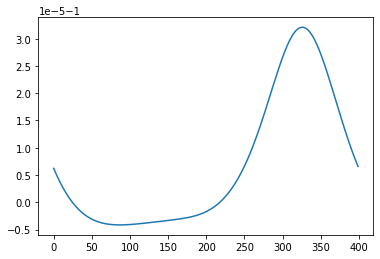

In [39]:
plt.plot(rews_beforer[:400])

In [23]:
acr

[array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.20881283, -0.2       ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.34894431, -0.6       ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.69333333, -1.        ]]),
 array([[ 0.

In [14]:
600 5070 1

-0.9895334243774414

 32%|███▏      | 128/400 [00:00<00:00, 659.87it/s]

in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in bas

 64%|██████▍   | 255/400 [00:00<00:00, 577.35it/s]

in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in bas

 95%|█████████▌| 381/400 [00:00<00:00, 599.02it/s]

in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in bas

100%|██████████| 400/400 [00:00<00:00, 597.80it/s]


in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class
in base class


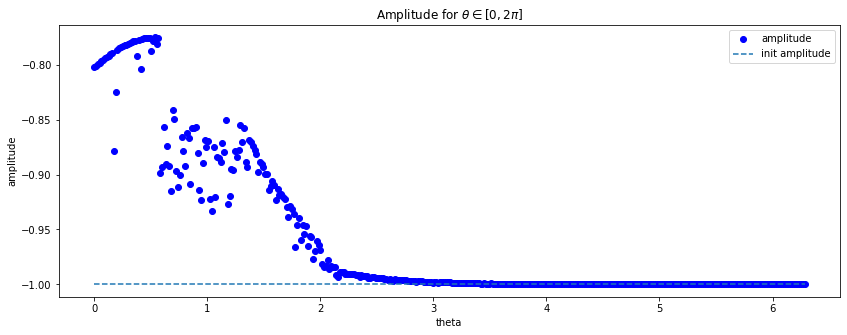

In [6]:
obs, acr, t = predict(model, env)

In [5]:
# _, _, rewards = predict(model, env)

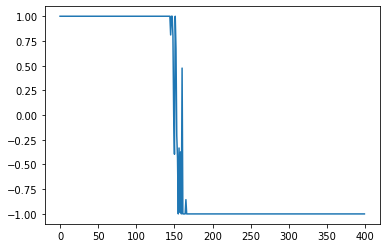

In [38]:
plt.plot(np.array(acr).squeeze(1)[:, 0])

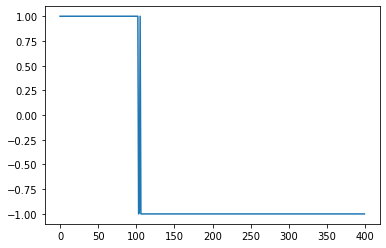

In [39]:
plt.plot(np.array(acr).squeeze(1)[:, 1])

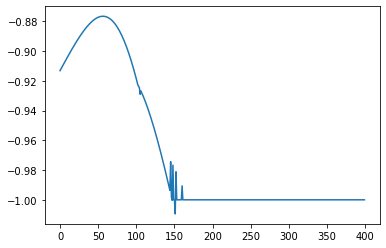

In [40]:
plt.plot(t)

In [10]:
acr

[array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], dtype=float32),
 array([[1., 1.]], d

In [6]:

models = []
envs = []

for i in configs:
    model, env = set_model_env(i)
    models.append(model)
    envs.append(env)
    
rewards, acs, obs = glue_predict(configs, models, envs)

Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Box(0.0, 1.5707963705062866, (1,), float32)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Box(1.5707963705062866, 3.1415927410125732, (1,), float32)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


Box(3.1415927410125732, 4.71238899230957, (1,), float32)
Loading a model without an environment, this model cannot be trained until it has a valid environment.


 21%|██        | 83/400 [00:00<00:00, 823.04it/s]

Box(4.71238899230957, 6.2831854820251465, (1,), float32)


100%|██████████| 400/400 [00:00<00:00, 744.65it/s]


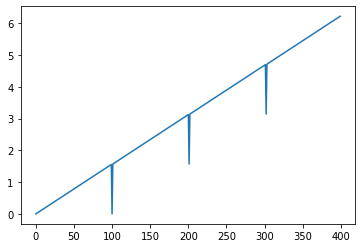

In [7]:
plt.plot(np.array(obs).squeeze())

In [38]:
from matplotlib import pyplot as plt
from celluloid import Camera
from tqdm import tqdm

In [45]:
width_p = np.array(acs).squeeze()[:, 0]
gap = np.array(acs).squeeze()[:, 1]
kfactor = np.array(acs).squeeze()[:, 2]
width_n = kfactor * width_p

amp = 0.9
tstep = 0.001
osc = 6280
   

100%|██████████| 400/400 [00:01<00:00, 371.13it/s]


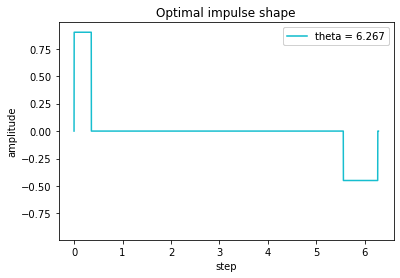

In [46]:
fig = plt.figure()
camera = Camera(fig)

for i in tqdm(range(400)):
    gap2 = osc - width_p[i] - gap[i] - width_n[i]    
    y = [0] + width_p[i] * [amp] + [0]*gap[i]+ [-amp / kfactor[i]] * width_n[i] + [0] * gap2
    x = np.arange(len(y)) * tstep
    step = 2*np.pi/400*i
#     print(step)
    plt.title('Optimal impulse shape')
    t = plt.plot(x, y) 
    plt.legend(t, [f'theta = {round(step,3)}'])
    plt.ylabel('amplitude')
    plt.xlabel('step')
    camera.snap()

animation = camera.animate()
animation.save('optimal_form.gif', writer = 'imagemagick')

In [14]:
for i in range(400):
    gap2 = osc - width_p[i] - gap[i] - width_n[i]    
    y = [0] + width_p[i] * [amp] + [0]*gap[i]+ [-amp / kfactor[i]] * width_n[i] + [0]*gap2
    x = np.arange(len(y)) * tstep
    plt.title('Optimal impulse shape')
    plt.plot(y) 
    plt.ylabel('amplitude')
    plt.xlabel('step')

In [24]:
gap[0]

5000

In [2]:
# model = ACKTR.load('ACKTR_3_interval_100mln.zip')
# env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
# model.set_env(env)

Text(0, 0.5, 'amplitude')

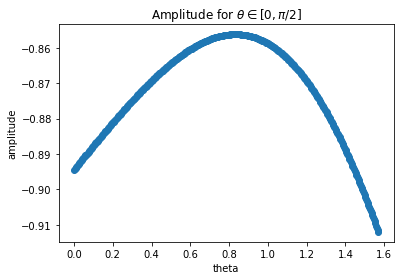

In [6]:
# plt.title(r'Amplitude for $\theta\in[0, \pi/2]$')
# plt.plot(np.linspace(0, np.pi/2, 400),  rews_before[:400], 'o')
# plt.xlabel('theta')
# plt.ylabel('amplitude')

In [3]:
env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
env.reset()
model = ACKTR(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
model.learn(10, log_interval=100)

Bbox
Box(0.0, 6.2831854820251465, (1,), float32)




Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





100%|██████████| 1000/1000 [00:01<00:00, 886.90it/s]

[array([2068.0586], dtype=float32), array([2068.1587], dtype=float32)]


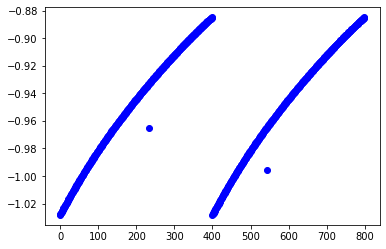

In [25]:
# rews_ = []
# #Store observations
# obs_ = []
# acs_ = []
# obs = env.reset()
# cum_list = []
# rew = 0
# rews_before = []

# for i in tqdm(range(1000)):
#     action, _states = model.predict(obs)
# #     print(action.shape)
#     obs, rewards, dones, info = env.step(action)
#     obs_.append(obs)
#     rews_before.append(rewards[0]/100-1)
#     acs_.append(action)
#     rews_.append(rewards)
#     rew += rewards
    
#     if dones:
#         obs = env.reset()
#         cum_list.append(rew)
#         rew = 0
        
# print(cum_list) 

# #     print(cum_listr)
# plt.plot(rews_before[:800], 'o', color='b')

In [27]:
# np.mean(rews_before[:400])

-0.9482985292381607

In [33]:
# acs_

[array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dt

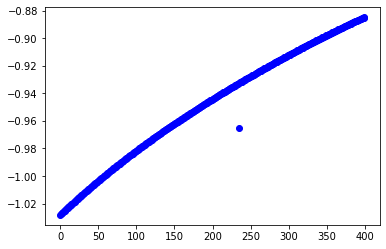

In [26]:
# plt.plot(rews_before[:400], 'o', color='b')

In [6]:
# ([900, 3000, 2] 120 - 220 norm

In [16]:
full_rews = []
full_acs = []
normal_vec = []
for j in tqdm(range(100)):
    rews_r = []
    #Store observations
    obs_r = []
    acs_r = []
    obsr = env.reset()
    cum_listr = []
    rewr = 0
    rews_beforer = []

    for i in range(400):
        action = np.array(model.env.action_space.sample())
        obs, rewards, dones, info = env.step(action)
        obs_r.append(obs)
#         print(rewards)
        rews_beforer.append(rewards[0]/100-1)
        acs_r.append(action)
        rews_r.append(rewards)
        rewr += rewards
        if (rewards[0]/100-1)>-0.97:
            normal_vec.append([obs, rewards[0]/100-1, action])

        if dones:
            obs = env.reset()
            cum_listr.append(rewr)
            rewr = 0

#     print(cum_listr)
#     plt.plot(rews_beforer[:400], 'o', color='b')
    full_rews.append(rews_beforer)
    full_acs.append(acs_r)
# plt.plot(rews_before[:400], 'o', color='r', label='obtained')
# plt.title('Amplitude reduction for each theta')
# plt.xlabel('step')
# plt.ylabel('amplitude')
# plt.legend()

100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


In [17]:
from tools.tools import show_statistics, plot_statistics

In [19]:
ps, ws, ks, rs = show_statistics(0, normal_vec, model)

Statistics for theta interval 0.
Number of samples 1128
Mean reward is -0.9159228444796927 +- 0.0497284144710782
Mean width_p is 341 +- 146
Mean gap is 5211 +- 381
Mean Kfactor is 1.1338652482269505 +- 0.5215109896621677


In [18]:
plot_statistics(normal_vec, model)


Statistics for theta interval 0.
Number of samples 1128
Mean reward is -0.9159228444796927 +- 0.0497284144710782
Mean width_p is 341 +- 146
Mean gap is 5211 +- 381
Mean Kfactor is 1.1338652482269505 +- 0.5215109896621677
Statistics for theta interval 1.
Number of samples 366
Mean reward is -0.9463049364220251 +- 0.02329550736226288
Mean width_p is 448 +- 104
Mean gap is 4780 +- 411
Mean Kfactor is 1.030054644808743 +- 0.17073770273189068
Statistics for theta interval 2.


TypeError: cannot unpack non-iterable NoneType object

NameError: name 'r' is not defined

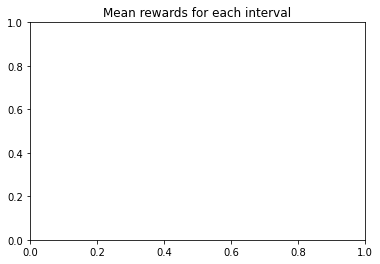

In [53]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Mean rewards for each interval')
ax1.boxplot(r, flierprops=green_diamond)
plt.show()

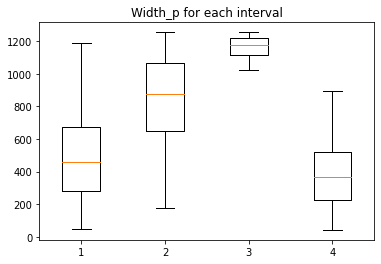

In [29]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Width_p for each interval')
ax3.boxplot(p, flierprops=green_diamond)
plt.show()

In [20]:
p[0][60]

525

In [19]:
w[0][60]

5210

In [21]:
k[0][60]

1

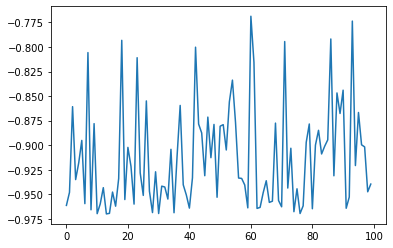

In [16]:
plt.plot(r[0][:100])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f847b44ce50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f847b4576d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f847b44ca10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f847b457f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f847b4603d0>],
 'means': []}

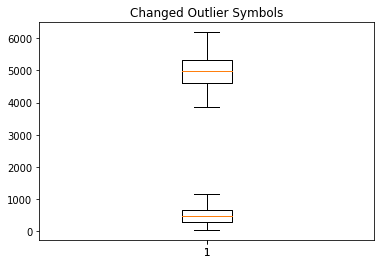

In [11]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Width_p')
ax3.boxplot(w, flierprops=green_diamond, la)

In [7]:
p, w, k = show_statistics(1, normal_vec, model, True)

Statistics for theta interval 1.
Number of samples 8923
Mean reward is -0.9103905491629591 +- 0.058135938293936124
Mean width_p is 850 +- 260
Mean gap is 3655 +- 1077
Mean Kfactor is 1.0038103776756697 +- 0.061610540475136054


In [8]:
p, w, k = show_statistics(2, normal_vec, model, True)

Statistics for theta interval 2.
Number of samples 199
Mean reward is -0.9592006317335158 +- 0.009046745383805588
Mean width_p is 1167 +- 63
Mean gap is 644 +- 222
Mean Kfactor is 1.0 +- 0.0


In [9]:
p, w, k = show_statistics(3, normal_vec, model, True)

Statistics for theta interval 3.
Number of samples 2049
Mean reward is -0.9346355404662992 +- 0.03048729199322984
Mean width_p is 373 +- 186
Mean gap is 5363 +- 364
Mean Kfactor is 1.0161054172767203 +- 0.1334099119337866


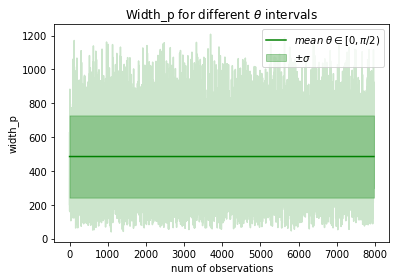

In [19]:
colors = ['green', 'yellow', 'red', 'blue']
intervals = [r'$mean \ \theta \in [0, \pi/2)$', r'$mean \ \theta \in [\pi/2, \pi)$', r'$mean \ \theta \in [\pi, 3\pi/2)$', r'$mean \ \theta \in [3\pi/2, 2\pi)$']

plt.title(r'Width_p for different $\theta$ intervals')
plt.plot(p, colors[0], alpha=0.2)
plt.plot([np.mean(p)]*p.shape[0], colors[0], label=intervals[0])
plt.fill_between(np.arange(p.shape[0]), np.array([np.mean(p)]*p.shape[0]) - np.std(p), np.array([np.mean(p)]*p.shape[0]) + np.std(p), 
                 color=colors[0], alpha=0.3, label='$\pm\sigma$')
plt.legend()
plt.ylabel('width_p')
plt.xlabel('num of observations')
plt.plot();


In [73]:
np.array([np.mean(p)]*p.shape[0]) + np.std(p)

array([722.87020513, 722.87020513, 722.87020513, ..., 722.87020513,
       722.87020513, 722.87020513])

In [ ]:
def show_statistics_plot():
    
    plt.title('Mean width')
    plt.plot(time, error_theta, label=r'$\hat{\theta}-\theta$')
    plt.fill_between(time, error_theta + cov_theta, error_theta - cov_theta, color='blue', alpha=0.3, label='$\pm3\sigma$')
    plt.plot()
    
    plt.xlabel('t')
    plt.ylabel(r'$\hat{\theta}-\theta$ ')
    plt.legend()
    plt.show()

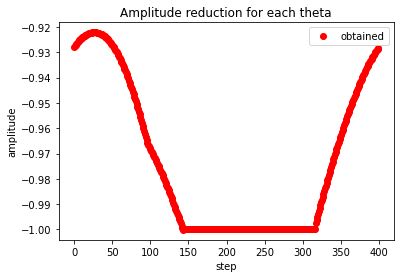

In [27]:
plt.plot(rews_before[:400], 'o', color='r', label='obtained')
plt.title('Amplitude reduction for each theta')
plt.xlabel('step')
plt.ylabel('amplitude')
plt.legend()

In [22]:


rews_ = []
#Store observations
obs_ = []
acs_ = []
obs = env.reset()
cum_list = []
rew = 0
rews_before = []

for i in tqdm(range(1000)):
    action, _states = model.predict(obs)
#     print(action.shape)
    obs, rewards, dones, info = env.step(action)
    obs_.append(obs)
    rews_before.append(rewards[0]/100-1)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards
    
    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0
        
print(cum_list) 

#     print(cum_listr)
plt.plot(rews_before[:800], 'o', color='b')






5264

In [4]:
def check_interval(theta, thetas_interval):
    interval = 5
    for i in range(len(thetas_interval)):
        if thetas_interval[i][0] <= theta and theta < thetas_interval[i][1]:
            interval = i
            break;
    return interval 

def set_model_env(config):
    with open(config, 'r') as ymlfile:
        cfg = yaml.load(ymlfile,Loader=yaml.FullLoader)
    model = ACKTR.load(cfg['model'])
    env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
    model.set_env(env)
    return model, env


def predict(models, envs):
    '''
    Input:
    models: List; list of pretrained models for each theta interval
    envs: List; envs for each theta interval
    ----------
    Return:
    rewards: List; otained rewards for each theta
    '''
    theta_intervals = [[0, np.pi/2], [np.pi/2, np.pi], [np.pi, 3*np.pi/2], [3*np.pi/2, 2*np.pi], [0, 2*np.pi]]
    rews_, obs_, acs_ = [], [], []
    obs = env.reset()
    cum_list = []
    rews_before = []
    for i in tqdm(range(400)):
        interval = check_interval(obs, theta_intervals)
        action, _states = models[interval].predict(obs)
        obs, rewards, dones, info = envs[interval].step(action)
        obs_.append(obs)
        rews_before.append(rewards[0]/100-1)
        acs_.append(action)
        rews_.append(rewards)    
    return rews_before

In [4]:
from tools.tools import set_model_env, predict

configs = ['configs/cfg0.yml', 'configs/cfg1.yml', 'configs/cfg2.yml', 'configs/cfg3.yml']

models = []
envs = []

for i in configs:
    model, env = set_model_env(i)
    models.append(model)
    envs.append(env)
    
plt.plot(predict(models, envs))

In [3]:
# model = ACKTR.load('ACKTR_1_interval_100mln.zip')
# env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
# model.set_env(env)

Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Box(1.5707963705062866, 3.1415927410125732, (1,), float32)


In [13]:
rews_ = []
#Store observations
obs_ = []
acs_ = []
obs = env.reset()
cum_list = []
rew = 0
rews_before = []

for i in tqdm(range(1000)):
    action, _states = model.predict(obs)
#     print(action.shape)
    obs, rewards, dones, info = env.step(action)
    obs_.append(obs)
    rews_before.append(rewards[0]/100-1)
    acs_.append(action)
    rews_.append(rewards)
    rew += rewards
    
    if dones:
        obs = env.reset()
        cum_list.append(rew)
        rew = 0
        
print(cum_list) 

100%|██████████| 1000/1000 [00:01<00:00, 838.07it/s]

[array([-128.98875], dtype=float32), array([-101.25734], dtype=float32)]


Text(0, 0.5, 'amplitude')

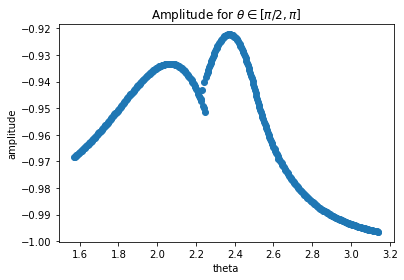

In [12]:
plt.title(r'Amplitude for $\theta\in[\pi/2, \pi]$')
plt.plot(np.linspace(np.pi/2, np.pi, 400),  rews_before[:400], 'o')
plt.xlabel('theta')
plt.ylabel('amplitude')

In [13]:
acs_[:300]

[array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([[1., 1., 1.]], dt

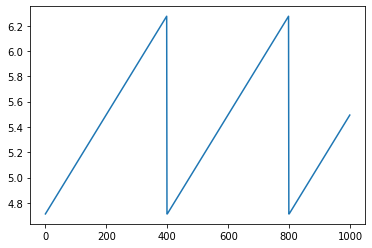

In [29]:
plt.plot(np.array(obs_).reshape(1000, 1))

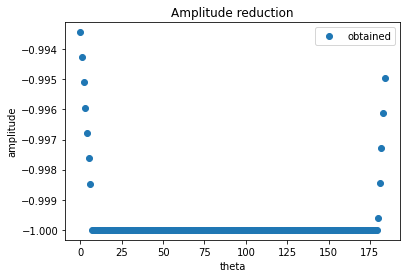

In [24]:
plt.title('Amplitude reduction')
# plt.plot(rews_beforer[135:320],'o', label='random acts', color='r')
plt.plot( rews_before[135:320],'o', label='obtained')
# plt.plot([400]*1000,np.linspace(-1.06, -0.92, 1000), '--', color='g', label='end episode')
# plt.plot([800]*1000,np.linspace(-1.06, -0.92, 1000), '--', color='g')

# plt.legend()
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude')
plt.show()

In [45]:
rews_beforer[120:200]

[-1.0000009913362737,
 -1.0000000046682083,
 -0.9858369016647339,
 -1.000001277611882,
 -0.985543862581253,
 -1.0000083675497444,
 -0.9864563262462616,
 -1.0000031334755477,
 -1.0000000099018633,
 -1.0000078691268572,
 -0.9881957864761353,
 -0.9988362583518028,
 -1.0000010784216284,
 -0.9999224155955017,
 -0.9997867347113788,
 -1.0000049606797985,
 -1.0000017857189232,
 -1.0000043080950853,
 -0.9913730931282043,
 -0.999921866543591,
 -0.9999863281508442,
 -1.0000000875724253,
 -0.9980069324374199,
 -0.9925378853082657,
 -1.000000794771622,
 -0.999904803223908,
 -0.9956954097747803,
 -0.9983272798359394,
 -0.9999233933212236,
 -0.999931227536872,
 -0.9941066974401473,
 -0.9997188909724355,
 -1.0000004766773782,
 -0.9999606356490404,
 -1.0000001788603368,
 -0.9999988325402955,
 -1.0209835481643676,
 -0.9953732189536094,
 -0.9992051695287227,
 -1.000000020526163,
 -0.9978971295058727,
 -1.0000022046356754,
 -1.0000019254369545,
 -0.9995071382448077,
 -0.9998516690637916,
 -1.0000002268338

In [81]:
high_lim = np.array([1256, 6278, 4]) 
low_lim =  np.array([1, 0, 1])
denorm_limits = [ low_lim, high_lim]

In [85]:
def denormalize(a, high_a, low_a):
    self.limits_low, self.limits_high
    de_act = self.limits_low + (high_a-low_a)*(a+1)/2 
    return int(de_act)
def normalize(a, high_a, low_a):
    norm_act = 2*(a-low_a)/(high_a-low_a)-1
    return norm_act

In [114]:
period_osc = 6280
cur_vec_a = []
a1 = np.random.uniform(low=-1,high=1)
cur_vec_a.append(a1)
a1_de = denormalize(a1, high_lim[0], low_lim[0])
period_osc -=a1_de
max_a2 = period_osc-a1_de
max_norm= normalize(max_a2, high_lim[1], low_lim[1])
a2 = np.random.uniform(low=-1,high=max_norm)
cur_vec_a.append(a2)
a2_de = denormalize(a2, high_lim[1], low_lim[1])
period_osc -=a2_de
max_a3 = int(np.clip(period_osc/a1_de,low_lim[2], high_lim[2]))
max_norm = normalize(max_a3, high_lim[2], low_lim[2])
a3 = np.random.uniform(low=-1,high=max_norm)
a3_de = denormalize(a3, high_lim[2], low_lim[2])
cur_vec_a.append(a3)
assert a1_de+a2_de+a1_de*a3_de<=period_osc

6280
a1de 1230
a2de 3333
osc 1717
a3de 1


In [113]:
cur_vec_a

[-0.8036038839049582, -0.08238172538154986, -0.943031888056963]

In [2]:
with open('configs/config.yml', 'r') as ymlfile:
    cfg = yaml.load(ymlfile,Loader=yaml.FullLoader)

In [11]:
env = DummyVecEnv([lambda: oscillatorEnv(cfg)])
env.reset()
model = ACKTR(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
model.learn(1000, log_interval=1000 )

AssertionError: 

In [5]:
env

In [23]:
env.action_space.bounded_below

array([ True,  True,  True])

In [24]:
env.action_space.bounded_above

array([ True,  True,  True])

In [ ]:
self.np_random.uniform(low=self.low[bounded],
                                            high=high[bounded],
                                            size=bounded[bounded].shape)

In [26]:
env.action_space.high

array([1., 1., 1.], dtype=float32)

In [27]:
env.action_space.bounded_below &  env.action_space.bounded_above

array([ True,  True,  True])